In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/datasets 
%pwd

/content/drive/My Drive/datasets


'/content/drive/My Drive/datasets'

In [4]:

df =  pd.read_csv('inter_norm_mini.csv')

In [5]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,14,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,7,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,29,Jogging,0,0.287281,0.887311,-0.360761
3,15,Jogging,0,0.944283,0.292972,-0.149990
4,8,Jogging,111020251899000,-0.124547,-0.706035,-0.697139


In [ ]:
# df.interpolate(method='linear', inplace=True) need norm ?

In [ ]:
df.head()

,user,activity,x-axis,y-axis,z-axis
0,14,Downstairs,0.668528,0.725448,-0.163691
1,7,Upstairs,0.454967,0.875538,-0.162600
2,29,Jogging,0.000000,0.000000,0.000000
3,15,Jogging,0.000000,0.000000,0.000000
4,8,Jogging,-0.124547,-0.706035,-0.697139


In [ ]:
sr = np.arange(0,50)
sr = sr.reshape(10,5)

In [ ]:
sr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [ ]:
def windowed_dataset(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size +1, shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window :  (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
# the data often load as batches
# batches can be created by using batch() method
dataset = tf.data.Dataset.range(50)
dataset = dataset.window(6,shift=3, drop_remainder=True)
dataset = dataset.flat_map(lambda window : window.batch(6))
dataset =  dataset.map(lambda window: (window[:-1],window[-1:]))
# shuffling the values
# dataset = dataset.shuffle(buffer_size=40)
# creating the batches
# dataset = dataset.batch(2).prefetch(1) # the value of prefetch ?
# printing out the data
for x, y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())

x =  [0 1 2 3 4]
y =  [5]
x =  [3 4 5 6 7]
y =  [8]
x =  [ 6  7  8  9 10]
y =  [11]
x =  [ 9 10 11 12 13]
y =  [14]
x =  [12 13 14 15 16]
y =  [17]
x =  [15 16 17 18 19]
y =  [20]
x =  [18 19 20 21 22]
y =  [23]
x =  [21 22 23 24 25]
y =  [26]
x =  [24 25 26 27 28]
y =  [29]
x =  [27 28 29 30 31]
y =  [32]
x =  [30 31 32 33 34]
y =  [35]
x =  [33 34 35 36 37]
y =  [38]
x =  [36 37 38 39 40]
y =  [41]
x =  [39 40 41 42 43]
y =  [44]
x =  [42 43 44 45 46]
y =  [47]


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(sr)
dataset = dataset.window(4,2, drop_remainder= True)
for window_data in dataset:
  for val in window_data:
    print(val.numpy())
  print()

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]

[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]

[20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34]
[35 36 37 38 39]

[30 31 32 33 34]
[35 36 37 38 39]
[40 41 42 43 44]
[45 46 47 48 49]



In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(sr)
dataset = dataset.window(6,shift=3, drop_remainder=True)
dataset = dataset.flat_map(lambda window : window.batch(6))
for window in dataset:
  print("window data")
  print(window.numpy())

window data
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
window data
[[15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]]


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(sr)
dataset = dataset.window(6,shift=3, drop_remainder=True)
dataset = dataset.flat_map(lambda window : window.batch(6))
# after creating the window batches use map to map the features and labels
dataset =  dataset.map(lambda window: (window[:,:-1],window[5,4]))
# printing out the data
for x, y in dataset:
  print('x = ',x.numpy(), 'y = ', y.numpy())

x =  [[ 0  1  2  3]
 [ 5  6  7  8]
 [10 11 12 13]
 [15 16 17 18]
 [20 21 22 23]
 [25 26 27 28]] y =  29
x =  [[15 16 17 18]
 [20 21 22 23]
 [25 26 27 28]
 [30 31 32 33]
 [35 36 37 38]
 [40 41 42 43]] y =  44


In [ ]:
def windowed_dataset_exp(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,:-1],window[5,4]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
data = windowed_dataset_exp(sr,6,3, 2, 6 )

In [ ]:
print(data)

<PrefetchDataset shapes: ((None, None, 4), (None,)), types: (tf.int64, tf.int64)>


In [ ]:
for x, y in data:
  print('x = ',x.numpy(), 'y = ', y.numpy())

x =  [[[ 0  1  2  3]
  [ 5  6  7  8]
  [10 11 12 13]
  [15 16 17 18]
  [20 21 22 23]
  [25 26 27 28]]

 [[15 16 17 18]
  [20 21 22 23]
  [25 26 27 28]
  [30 31 32 33]
  [35 36 37 38]
  [40 41 42 43]]] y =  [29 44]


In [ ]:
r[:,1]

array([ 1,  6, 11, 16, 21])

In [ ]:
# data windowing function test case passed
def create_windowed_dataset(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,1:],window[window_size - 1,0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [6]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,14,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,7,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,29,Jogging,0,0.287281,0.887311,-0.360761
3,15,Jogging,0,0.944283,0.292972,-0.149990
4,8,Jogging,111020251899000,-0.124547,-0.706035,-0.697139


In [ ]:
# datawindowing function OK
# encoding the labels

In [7]:
df.dtypes

user           int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#droping the user columns
df.drop('user', axis = 1, inplace=True)

KeyError: ignored

In [10]:
df

,activity,timestamp,x-axis,y-axis,z-axis
0,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,Jogging,0,0.287281,0.887311,-0.360761
3,Jogging,0,0.944283,0.292972,-0.149990
4,Jogging,111020251899000,-0.124547,-0.706035,-0.697139
...,...,...,...,...,...
105,Downstairs,1749732310000,0.449064,0.893440,-0.010313
106,Downstairs,24512351662000,-0.157978,0.929553,0.333128
107,Jogging,59899442333000,0.687072,0.721425,-0.086476
108,Walking,129874801576000,0.927688,0.373049,-0.015133


In [ ]:
# labelencoder object
le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])

In [11]:
df

,activity,timestamp,x-axis,y-axis,z-axis
0,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,Jogging,0,0.287281,0.887311,-0.360761
3,Jogging,0,0.944283,0.292972,-0.149990
4,Jogging,111020251899000,-0.124547,-0.706035,-0.697139
...,...,...,...,...,...
105,Downstairs,1749732310000,0.449064,0.893440,-0.010313
106,Downstairs,24512351662000,-0.157978,0.929553,0.333128
107,Jogging,59899442333000,0.687072,0.721425,-0.086476
108,Walking,129874801576000,0.927688,0.373049,-0.015133


In [ ]:
df['activity'].unique()

array([0, 4, 1, 2, 5, 3])

In [ ]:
le.inverse_transform(df['activity'].unique())

array(['Downstairs', 'Upstairs', 'Jogging', 'Sitting', 'Walking',
       'Standing'], dtype=object)

In [ ]:
df.dtypes

activity      int64
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [ ]:
df

In [ ]:
# creating windowed dataset
df_windowed = create_windowed_dataset(df, 20, 10, 1, 128)

In [ ]:
count = 0
for i , j in df_windowed:
  print(count)
  count +=1
  print('x = ', i, 'y = ',j)

0
x =  tf.Tensor(
[[[-0.36199418  0.93084219 -0.04993023]
  [-0.8014647   0.36263294  0.47555408]
  [ 0.5747794   0.77167352  0.27230244]
  [ 0.27677702  0.8839008   0.37697992]
  [ 0.20184381  0.97171428 -0.12259869]
  [ 0.38267834  0.89607353 -0.22496561]
  [ 0.3212759   0.94192252  0.0977945 ]
  [-0.63316247  0.66550737  0.39522808]
  [-0.7936093  -0.53262746 -0.29409567]
  [-0.92401931 -0.36114342  0.12555377]
  [ 0.3072479   0.93477431  0.17831352]
  [-0.5338924   0.83278968 -0.1463566 ]
  [ 0.10584969  0.32377551  0.94019427]
  [-0.94705918  0.25118954  0.19995682]
  [ 0.77224331  0.48635907 -0.4087727 ]
  [ 0.21565834  0.76289136  0.60949836]
  [ 0.58551313  0.24710639  0.77208342]
  [ 0.72968543  0.59958648  0.32871754]
  [ 0.79448334  0.59979374 -0.09509838]
  [ 0.19566     0.97904116  0.0565294 ]]], shape=(1, 20, 3), dtype=float64) y =  tf.Tensor([4.], shape=(1,), dtype=float64)
1
x =  tf.Tensor(
[[[-0.25652545  0.95769501  0.1304414 ]
  [-0.46730622  0.86974975  0.15861987]


In [ ]:
df_windowed

<PrefetchDataset shapes: ((None, None, 3), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
window_size = 20

In [ ]:
# checking DNN on mini set


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape = (20,3)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=8e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)

history = model.fit(df_windowed, epochs=200, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 9.2691
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 8.9499
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 14.0141
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 8.2721
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 16.4195
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 10.8392
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 12.0331
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 8.3204
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 7.0074
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 10.1711
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 8.6593
Epoch 12/200
10/10 [==============================] - 0s 2ms/step - loss: 11.8499
Epoch 13/200
10/10 [===========

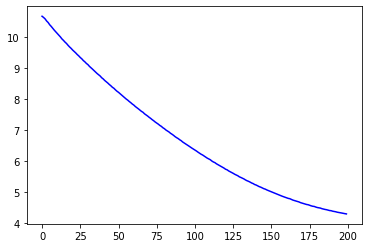

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

In [ ]:
df.loc[:20,1:]

TypeError: ignored

In [13]:
################################################################# windowsing Testing 2 ########################################################

'''
Notes to improve 
encoding the activity to codes 
one hot encoding of activity during windowing only
'''
df =  pd.read_csv('inter_norm_mini.csv')
from tensorflow.keras.utils import to_categorical

In [14]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,14,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,7,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,29,Jogging,0,0.287281,0.887311,-0.360761
3,15,Jogging,0,0.944283,0.292972,-0.149990
4,8,Jogging,111020251899000,-0.124547,-0.706035,-0.697139


In [15]:
df.drop('user', axis=1,inplace = True)

In [16]:
df

,activity,timestamp,x-axis,y-axis,z-axis
0,Downstairs,57725432324000,0.668528,0.725448,-0.163691
1,Upstairs,208866321473000,0.454967,0.875538,-0.162600
2,Jogging,0,0.287281,0.887311,-0.360761
3,Jogging,0,0.944283,0.292972,-0.149990
4,Jogging,111020251899000,-0.124547,-0.706035,-0.697139
...,...,...,...,...,...
105,Downstairs,1749732310000,0.449064,0.893440,-0.010313
106,Downstairs,24512351662000,-0.157978,0.929553,0.333128
107,Jogging,59899442333000,0.687072,0.721425,-0.086476
108,Walking,129874801576000,0.927688,0.373049,-0.015133


In [17]:
df.drop('timestamp', axis=1, inplace=True)

In [18]:
df.head()

,activity,x-axis,y-axis,z-axis
0,Downstairs,0.668528,0.725448,-0.163691
1,Upstairs,0.454967,0.875538,-0.162600
2,Jogging,0.287281,0.887311,-0.360761
3,Jogging,0.944283,0.292972,-0.149990
4,Jogging,-0.124547,-0.706035,-0.697139


In [19]:
df.dtypes

activity     object
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [24]:
df.activity = df.activity.astype('category')

In [25]:
df.activity = df.activity.cat.codes

In [ ]:
# splitting to train and test

In [20]:
df.index

RangeIndex(start=0, stop=110, step=1)

In [26]:
window_size = 20
# so last 20 for testing
train = df[:90]
test = df[90:]

In [27]:
print(train.shape)
print(test.shape)

(90, 4)
(20, 4)


In [29]:
# updating the windowing

In [61]:
# action is a function np.mod() or the last label , fn to be implimented currently only np.mod
from statistics import mode
@tf.function
def create_windowed_dataset(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,1:],to_categorical(mode(window[:,0])))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

SyntaxError: ignored

In [59]:
train.head()

,activity,x-axis,y-axis,z-axis
0,0,0.668528,0.725448,-0.163691
1,4,0.454967,0.875538,-0.162600
2,1,0.287281,0.887311,-0.360761
3,1,0.944283,0.292972,-0.149990
4,1,-0.124547,-0.706035,-0.697139


In [60]:
df_windowed = create_windowed_dataset(train, 20, 10, 1, 1)

AttributeError: ignored

In [50]:
count = 0
for i , j in df_windowed:
  print(count)
  count +=1
  print('x = ', i, 'y = ',j)

0
x =  tf.Tensor(
[[[ 0.6685284   0.72544819 -0.16369087]
  [ 0.45496694  0.87553776 -0.16259987]
  [ 0.28728102  0.88731124 -0.36076083]
  [ 0.94428294  0.2929721  -0.14999024]
  [-0.12454685 -0.70603506 -0.69713885]
  [-0.68807897 -0.47305429  0.55024264]
  [ 0.53509978  0.17343934  0.82679322]
  [ 0.99259356  0.11641529  0.03472035]
  [ 0.32051582  0.86609973  0.38358944]
  [ 0.11197539  0.95277305  0.28228537]
  [-0.3585072   0.93065542 -0.07316473]
  [ 0.83627903  0.09824842  0.53942992]
  [ 0.93468117  0.07189855  0.34814036]
  [-0.2625914   0.91857256  0.29541532]
  [-0.54579279  0.81868919 -0.17848877]
  [ 0.44727076  0.72234769  0.5274113 ]
  [ 0.95034663  0.25454465 -0.17902041]
  [ 0.83707636 -0.08834815 -0.53990533]
  [-0.04333827  0.99803643  0.04522254]
  [-0.20481394  0.95766032 -0.20233134]]], shape=(1, 20, 3), dtype=float64) y =  tf.Tensor([[0. 0. 1.]], shape=(1, 3), dtype=float32)
1
x =  tf.Tensor(
[[[-0.3585072   0.93065542 -0.07316473]
  [ 0.83627903  0.09824842  0.

In [57]:
tf.__version__

'2.4.1'